In [2]:
import pandas as pd
import numpy as np
from arch import arch_model
from pykrx import stock

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

# ARCH 모델  
## ARCH 모델은 시계열의 무조건과 조건부의 차이를 명시적으로 인식한다.
## 평균 프로세스에서 조건부 분산을 과거 잔차(오차)의 함수로 모델링한다.
## 무조건 분산은 시간에 대해 일정하다고 가정한다.
## 모델의 사전 잔차수(q)를 자귀회귀 모델과 유사하게 지정해야 한다.
## ARCH 모델은 주어진 시계열에 다른모델을 적합화한 후 얻은 잔차에만 적용해야 한다.
## 잔차는 불연속 백색 잡음의 관측값과 유사해야 한다. -제로 평균, 정상성

In [4]:
# NAVER 주식 가져오기
df = stock.get_market_ohlcv_by_date('20180101', "20211231", "035420")
df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2018-01-02,174447,177251,174247,177251,93587
2018-01-03,175448,177051,173045,174447,84790
2018-01-04,176048,179653,174847,178853,130112
2018-01-05,178852,183858,176249,181857,136811
2018-01-08,183258,190869,181856,190269,196338


In [5]:
returns = 100*df["종가"].pct_change().dropna()

In [6]:
START_DATE ='20180101'
END_DATE ="20211231"

In [7]:
returns.name = 'asset_Returns'
print(f'Average return: {round(returns.mean(), 2)}%')

Average return: 0.1%


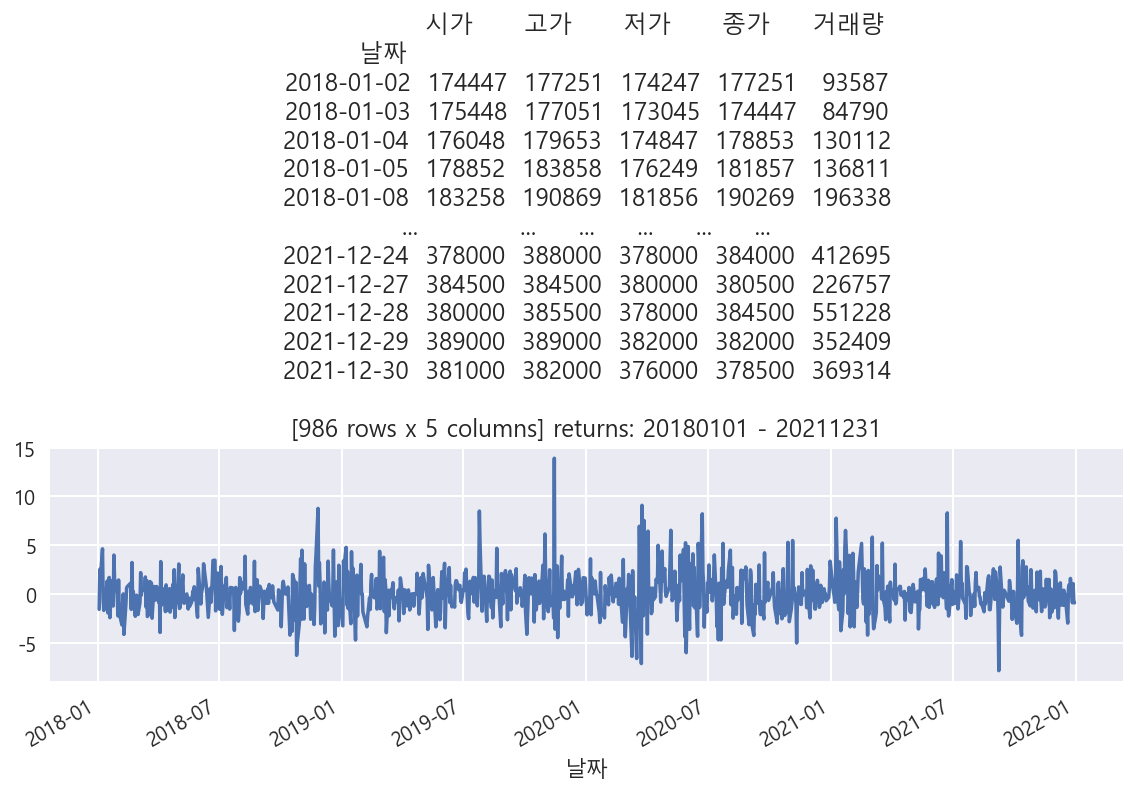

In [8]:
returns.plot(title=f'{df} returns: {START_DATE} - {END_DATE}')

plt.tight_layout()
plt.show()

In [9]:
model = arch_model(returns, mean='Zero', vol='ARCH', p=1, o=0,q=0)

In [10]:
# fit aptjem tkdyd ahepf wjrgkqghk
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -2144.78
Distribution:                  Normal   AIC:                           4293.55
Method:            Maximum Likelihood   BIC:                           4303.34
                                        No. Observations:                  985
Date:                Sun, Nov 13 2022   Df Residuals:                      985
Time:                        15:47:46   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.0309      0.325     12.390  2.970e-35   [  3.39

In [12]:
model.forecast()
model

TypeError: forecast() missing 1 required positional argument: 'params'

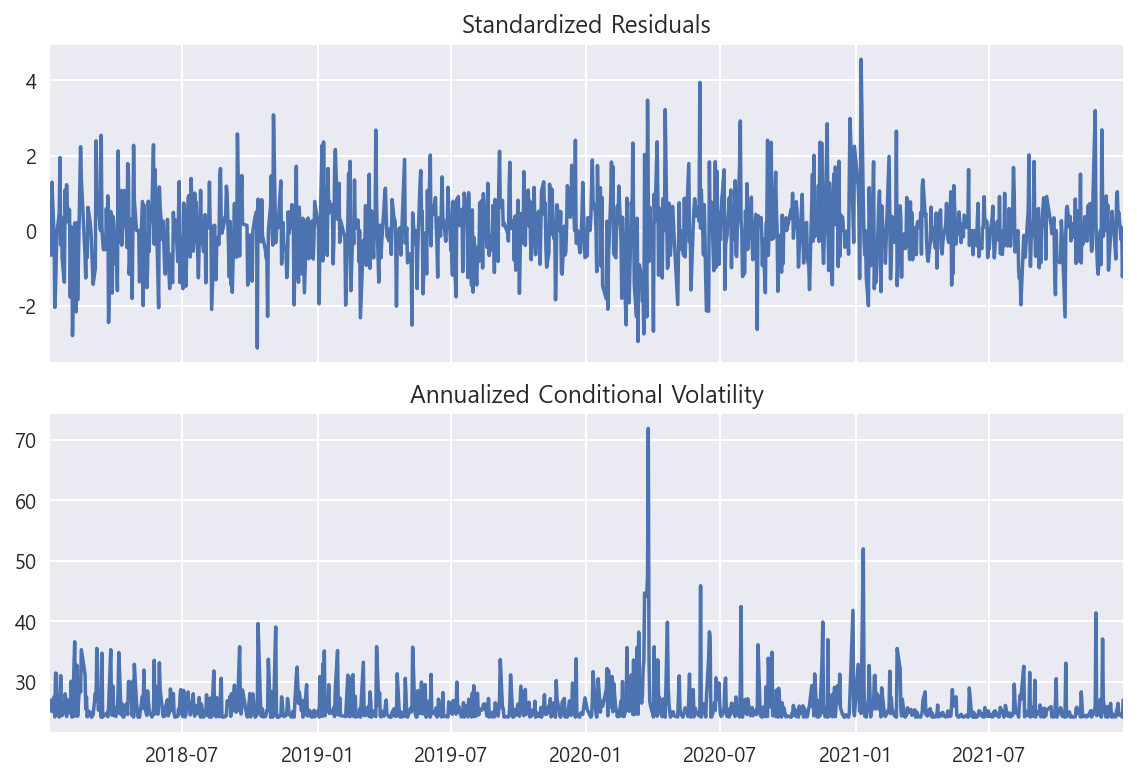

In [102]:
model_fitted.plot(annualize='D')

plt.tight_layout()
# plt.savefig('images/ch5_im3.png')
plt.show()

In [103]:
model = arch_model(returns, mean='Zero', vol='GARCH', 
                   p=1, o=0, q=1)

In [104]:
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1869.49
Distribution:                  Normal   AIC:                           3744.99
Method:            Maximum Likelihood   BIC:                           3759.67
                                        No. Observations:                  985
Date:                Sun, Nov 13 2022   Df Residuals:                      985
Time:                        14:30:02   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0472  3.420e-02      1.381      0.167  [-

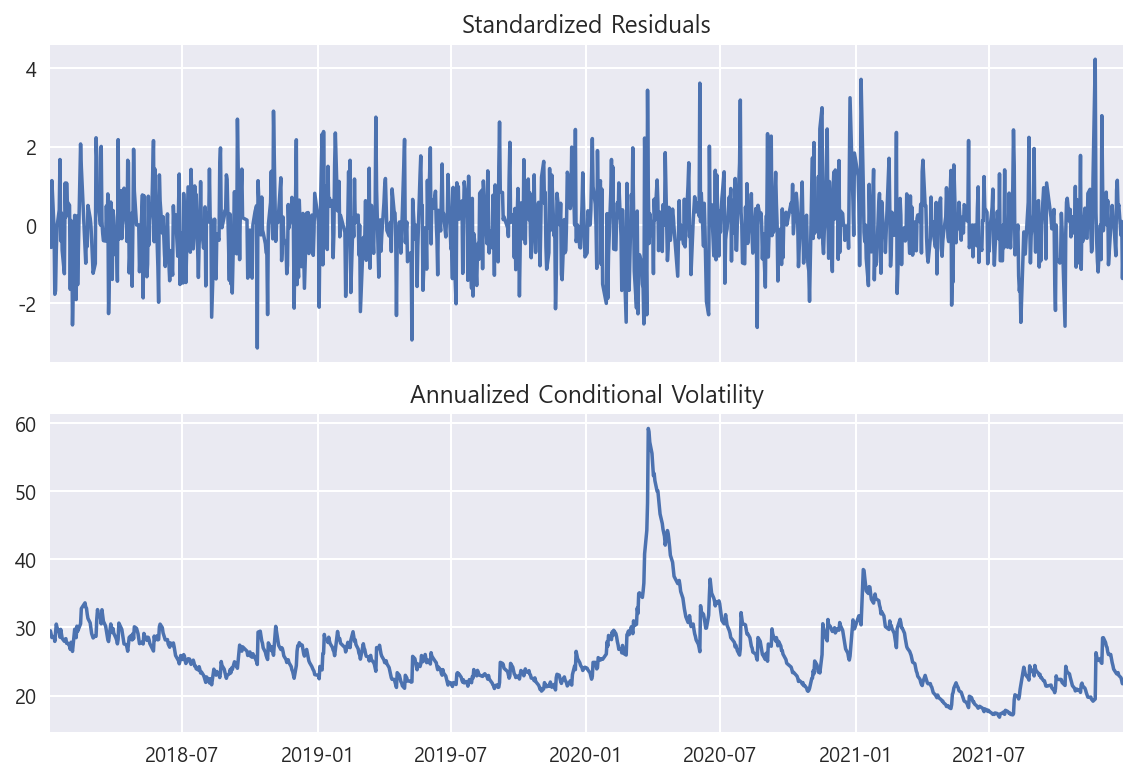

In [105]:
model_fitted.plot(annualize='D')

plt.tight_layout()
# plt.savefig('images/ch5_im5.png')
plt.show()

조건부 평균모델
- 제로 평균
- 상수 평균
- ARIMA의 모든 변형
- 회귀모델

조건부 변동성 모델
- GJR -GARCH : 수익률의 비대칭성을 고려하는 GARCH 모델의 변형(음의 수익률은 양의 수익률 보다 변동성에 더 많은 영향을 끼친다)
- EGARCH : Exponential GARCH (지수)
- TGARCH : Threshold GARCH (한걔값)
- FIGARCH : Fractionally integrated GARCH, 비정상성 데이터에 사용
- GARCH-MIDAS : 변동성이 단기 GARCH 성분과 추가적 설명 변수에 의한 장기 성분으로 분해된다.
- 다변량 GARCH 모델: 예,CCC-/DCC-GARCH

오차의 분포
- 스튜던트 t- 분포
- 스큐(Skew)--t 분포
- 일반화 오차 분포
- 스큐 GED

In [212]:
RISKY_ASSET = ['005930','035420','005380']
N = len(RISKY_ASSET)
START_DATE = '2018-01-01'
END_DATE = '2021-12-31'

In [213]:
# 삼성전자, 네이버, 현대차
df_1 = stock.get_market_ohlcv_by_date('20180101', "20211231", RISKY_ASSET[0])
df_2 = stock.get_market_ohlcv_by_date('20180101', "20211231", RISKY_ASSET[1])
df_3 = stock.get_market_ohlcv_by_date('20180101', "20211231", RISKY_ASSET[2])



In [214]:
# 삼성전자
returns_1 = 100* df_1["종가"].pct_change().dropna()
# 네이버
returns_2 = 100* df_2["종가"].pct_change().dropna()
# 현대차
returns_3 = 100* df_3["종가"].pct_change().dropna()
returns = pd.concat([returns_1, returns_2, returns_3],axis=1)
returns.columns = ["삼성전자", '네이버', '현대차']
returns

,삼성전자,네이버,현대차
날짜,,,
2018-01-03,1.176009,-1.581937,0.668896
2018-01-04,-1.046106,2.525695,-2.657807
2018-01-05,2.036022,1.679592,1.706485
2018-01-08,-0.191865,4.625612,1.342282
2018-01-09,-3.114187,-0.631212,0.993377
...,...,...,...
2021-12-24,0.750939,1.587302,3.110048
2021-12-27,-0.372671,-0.911458,-0.928074
2021-12-28,0.124688,1.051248,0.234192


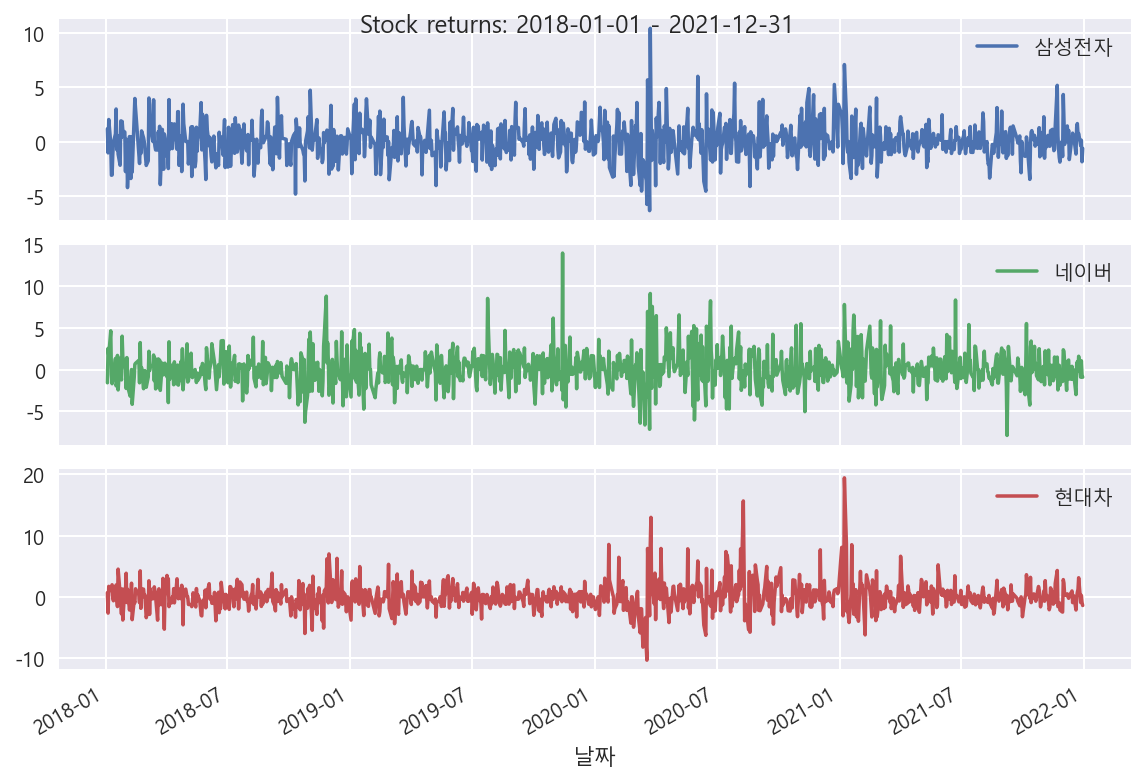

In [215]:
returns.plot(subplots=True, 
             title=f'Stock returns: {START_DATE} - {END_DATE}')

plt.tight_layout()
# plt.savefig('images/ch5_im6.png')
plt.show()

In [216]:
# 걔수
coeffs = []
# 조건부 변동성
cond_vol = []
# 표준화 잔차
std_resids = []
# 모델
models = []

In [217]:
for asset in returns.columns:
    # specify and fit the model
    model = arch_model(returns[asset], mean='Constant', 
                       vol='GARCH', p=1, o=0, q=1).fit(update_freq=0, 
                                                       disp='off');
    # store results in the lists 
    coeffs.append(model.params)
    cond_vol.append(model.conditional_volatility)
    std_resids.append(model.resid / model.conditional_volatility)
    models.append(model)

In [218]:
coeffs_df = pd.DataFrame(coeffs, index=returns.columns)
cond_vol_df = pd.DataFrame(cond_vol).transpose() \
                                    .set_axis(returns.columns, 
                                              axis='columns', 
                                              inplace=False)
std_resids_df = pd.DataFrame(std_resids).transpose() \
                                        .set_axis(returns.columns, 
                                                  axis='columns', 
                                                  inplace=False)

In [219]:
coeffs_df

,mu,omega,alpha[1],beta[1]
삼성전자,0.057343,0.047345,0.047663,0.934995
네이버,0.066604,0.314377,0.076454,0.856518
현대차,-0.007820,0.078379,0.073270,0.914796


In [223]:
# 상수 조건부 상관관계 행렬(R)을 계산한다
R =std_resids_df.transpose().dot(std_resids_df).div(len(std_resids_df))
R

,삼성전자,네이버,현대차
삼성전자,1.001455,0.291102,0.343621
네이버,0.291102,1.000950,0.220098
현대차,0.343621,0.220098,1.000035


In [227]:
# 조건부 공분산의 1단계 -선행 예측
diag = []
D = np.zeros((N, N))
print(D)
for model in models:
    diag.append(model.forecast(horizon=1).variance.values[-1][0])
diag = np.sqrt(np.array(diag))
np.fill_diagonal(D, diag)
print(diag)
# calculate the conditional covariance matrix
H = np.matmul(np.matmul(D, R.values), D)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[1.3759798  1.70553718 1.60576293]


In [222]:
H

array([[1.89607446, 0.68315411, 0.75923001],
       [0.68315411, 2.91162117, 0.60277943],
       [0.75923001, 0.60277943, 2.57856567]])

In [ ]:
%load_ext rpy2.ipython

Unable to determine R home: [WinError 2] 지정된 파일을 찾을 수 없습니다


In [ ]:
%%R